In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (required for SentimentIntensityAnalyzer)
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/Reviews 500.csv"
df = pd.read_csv(file_path)

# Display first few rows to understand the structure
print(df.head())

# Assuming the reviews are stored in a column named 'review'
if 'review' not in df.columns:
    print("Error: The dataset must contain a column named 'review' for sentiment analysis.")
else:
    # Initialize the sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Function to compute sentiment scores
    def get_sentiment(text):
        score = sia.polarity_scores(str(text))  # Ensure text is string
        if score['compound'] >= 0.05:
            return "Positive"
        elif score['compound'] <= -0.05:
            return "Negative"
        else:
            return "Neutral"

    # Apply sentiment analysis
    df['Sentiment'] = df['review'].apply(get_sentiment)

    # Display sentiment distribution
    sentiment_counts = df['Sentiment'].value_counts()

    # Plot sentiment distribution
    plt.figure(figsize=(6, 4))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Sentiment Analysis Results")
    plt.xticks(rotation=0)
    plt.show()

    # Display results
    print(df[['review', 'Sentiment']].head())



   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanu

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Reviews 500.csv to Reviews 500 (1).csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


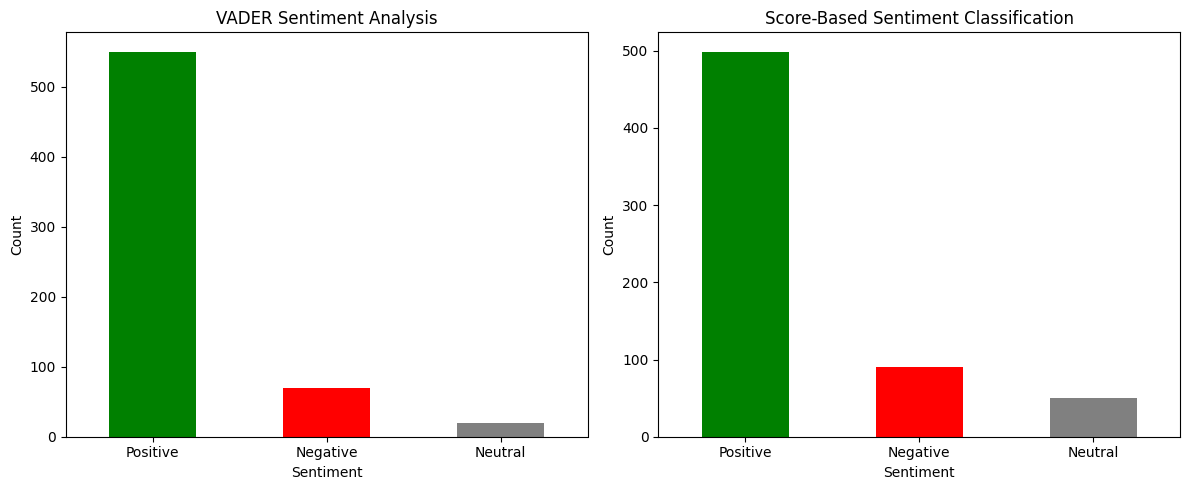

                                                 Text  Score Score_Sentiment  \
0   I have bought several of the Vitality canned d...      5        Positive   
1   Product arrived labeled as Jumbo Salted Peanut...      1        Negative   
2   This is a confection that has been around a fe...      4        Positive   
3   If you are looking for the secret ingredient i...      2        Negative   
4   Great taffy at a great price.  There was a wid...      5        Positive   
5   I got a wild hair for taffy and ordered this f...      4        Positive   
6   This saltwater taffy had great flavors and was...      5        Positive   
7   This taffy is so good.  It is very soft and ch...      5        Positive   
8   Right now I'm mostly just sprouting this so my...      5        Positive   
9   This is a very healthy dog food. Good for thei...      5        Positive   
10  I don't know if it's the cactus or the tequila...      5        Positive   
11  One of my boys needed to lose some w

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (Run this only in Google Colab)
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/Reviews 500.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Ensure the dataset has the correct columns
if 'Text' not in df.columns or 'Score' not in df.columns:
    print("Error: Dataset must contain 'Text' and 'Score' columns")
else:
    # Initialize Sentiment Analyzer
    sia = SentimentIntensityAnalyzer()

    # Function to compute sentiment using VADER
    def get_vader_sentiment(text):
        score = sia.polarity_scores(str(text))  # Convert to string
        if score['compound'] >= 0.05:
            return "Positive"
        elif score['compound'] <= -0.05:
            return "Negative"
        else:
            return "Neutral"

    # Apply VADER sentiment analysis
    df['VADER_Sentiment'] = df['Text'].apply(get_vader_sentiment)

    # Convert "Score" into categorical sentiment
    def get_score_sentiment(score):
        if score >= 4:
            return "Positive"
        elif score == 3:
            return "Neutral"
        else:
            return "Negative"

    df['Score_Sentiment'] = df['Score'].apply(get_score_sentiment)

    # Count sentiment distribution
    vader_sentiment_counts = df['VADER_Sentiment'].value_counts()
    score_sentiment_counts = df['Score_Sentiment'].value_counts()

    # Plot Sentiment Analysis Results
    plt.figure(figsize=(12, 5))

    # VADER Sentiment Distribution
    plt.subplot(1, 2, 1)
    vader_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("VADER Sentiment Analysis")
    plt.xticks(rotation=0)

    # Score-Based Sentiment Distribution
    plt.subplot(1, 2, 2)
    score_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Score-Based Sentiment Classification")
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # Show Sample Results
    print(df[['Text', 'Score', 'Score_Sentiment', 'VADER_Sentiment']].head(20))



<ipython-input-12-02e3b82880d9>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


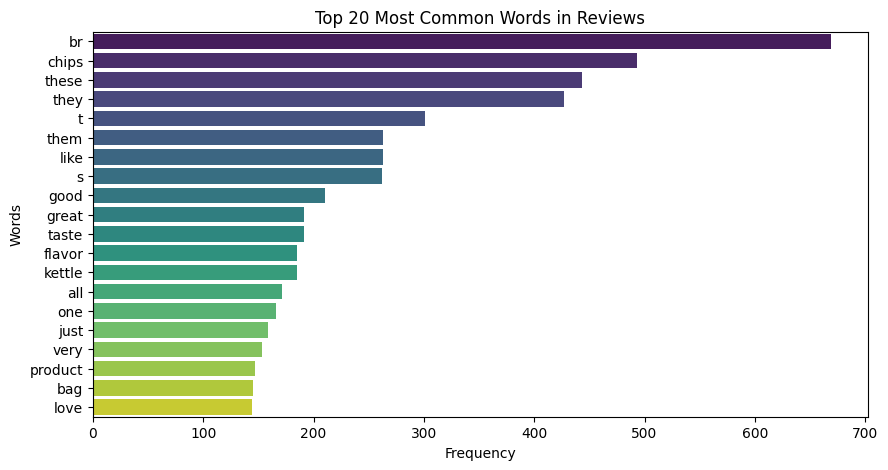

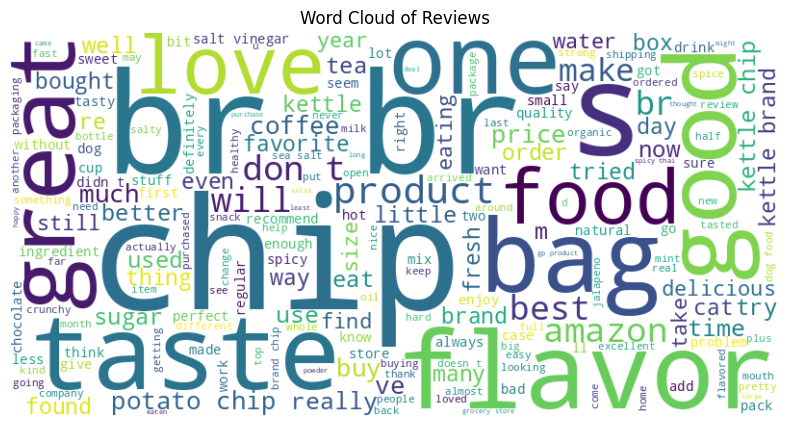

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re

# Load the dataset
file_path = "/content/Reviews 500.csv"
df = pd.read_csv(file_path)

# Define a basic stopword list (since we cannot download nltk's stopwords)
manual_stopwords = set([
    "the", "a", "and", "is", "in", "it", "to", "of", "for", "on", "this", "that",
    "with", "as", "are", "was", "but", "at", "by", "an", "be", "or", "so", "if",
    "out", "not", "you", "your", "we", "from", "can", "have", "has", "i", "me", "my"
])

# Text Cleaning Function (Without `nltk`)
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = text.split()  # Split words manually
    tokens = [word for word in tokens if word not in manual_stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Word Frequency Analysis
all_words = ' '.join(df['Cleaned_Text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Plot Most Common Words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Reviews")
plt.show()

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

# N-gram Analysis (Bigrams & Trigrams)
def get_ngrams(text_series, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_matrix = vectorizer.fit_transform(text_series)
    ngram_counts = ngram_matrix.sum(axis=0)
    ngram_freq = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:10]

bigrams = get_ngrams(df['Cleaned_Text'], 2)
trigrams = get_ngrams(df['Cleaned_Text'], 3)

# Display Bigrams and Trigrams
bigram_df = pd.DataFrame(bigrams, columns=["Bigram", "Frequency"])
trigram_df = pd.DataFrame(trigrams, columns=["Trigram", "Frequency"])

import ace_tools as tools
tools.display_dataframe_to_user(name="Bigram Analysis", dataframe=bigram_df)
tools.display_dataframe_to_user(name="Trigram Analysis", dataframe=trigram_df)


In [ ]:
!pip install NRCLex


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=259c4b674445adb030aa5705058bebe1314855c4fdb99c00a8c8fd7a0195895f
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built NRCLex


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nrclex import NRCLex

# Load the dataset
file_path = "/content/Reviews 500.csv"
df = pd.read_csv(file_path)

# Ensure the dataset has a 'Text' column
if 'Text' in df.columns:
    # Text Cleaning Function
    def preprocess_text(text):
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        return text

    # Apply preprocessing
    df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

    # Function to get emotion scores from NRC Lexicon
    def get_emotions(text):
        emotion_scores = NRCLex(text).affect_frequencies
        return emotion_scores

    # Apply emotion analysis
    df['Emotions'] = df['Cleaned_Text'].apply(get_emotions)

    # Convert emotion dictionary to separate columns
    emotion_df = df['Emotions'].apply(pd.Series).fillna(0)

    # Merge back to main dataframe
    df = pd.concat([df, emotion_df], axis=1)

    # Aggregate emotion scores
    emotion_totals = emotion_df.sum()

    # Plot Emotion Analysis
    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_totals.index, y=emotion_totals.values, palette="coolwarm")
    plt.xlabel("Emotions")
    plt.ylabel("Frequency")
    plt.title("Emotion Distribution in Reviews")
    plt.xticks(rotation=45)
    plt.show()

    # Display Sample Emotional Classification
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Emotional Analysis Results", dataframe=df[['Text', 'Emotions']].head(20))
else:
    print("Error: Dataset must contain a 'Text' column.")



**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
!pip install NRCLex


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nrclex import NRCLex

# Load the dataset
file_path = ""  # Ensure the correct file path
df = pd.read_csv(file_path)

# Ensure the dataset has a 'Text' column
if 'Text' in df.columns:
    # Text Cleaning Function (Avoids nltk downloads)
    def preprocess_text(text):
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        return text

    # Apply preprocessing
    df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

    # Function to get emotion scores using NRCLex
    def get_emotions(text):
        emotions = NRCLex(text).affect_frequencies
        return emotions

    # Apply emotion analysis
    df['Emotions'] = df['Cleaned_Text'].apply(get_emotions)

    # Convert emotion dictionary into separate columns
    emotion_df = df['Emotions'].apply(pd.Series).fillna(0)

    # Merge back to the main dataframe
    df = pd.concat([df, emotion_df], axis=1)

    # Aggregate emotion scores across all reviews
    emotion_totals = emotion_df.sum()

    # Plot Emotion Analysis
    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_totals.index, y=emotion_totals.values, palette="coolwarm")
    plt.xlabel("Emotions")
    plt.ylabel("Frequency")
    plt.title("Emotion Distribution in Reviews")
    plt.xticks(rotation=45)
    plt.show()

    # Display Sample Emotional Classification
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Emotional Analysis Results", dataframe=df[['Text', 'Emotions']].head(20))
else:
    print("Error: Dataset must contain a 'Text' column.")
